In [2]:
import numpy as np
import pandas as pd
import os
import subprocess, pickle
from matplotlib import pyplot as plt
import math
import scipy
#### load feven's pilot data
os.chdir('/Users/natashabanga/Documents/PsychSummer/pilot_analysis/')
cleanupPath = os.path.join(os.getcwd(), 'code/cleanup.py')
getgazePath = os.path.join(os.getcwd(), 'code/get_gaze.py')

In [8]:

dataPath = os.path.join(os.getcwd(), 'data/feven/walking_outdoor')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

# compute gaze angle
getgazePath = os.path.join(os.getcwd(), 'code/get_gaze.py')
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
control1_outdoorwalking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

angles_control1_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_control1_df = pd.DataFrame(angles_control1_data)

# get gaze position data
gaze_positions_control1 = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
gaze_positions_control1_1 = gaze_positions_control1.loc[(gaze_positions_control1['timestamp [ns]'] >= 1690395539037000000) & (gaze_positions_control1['timestamp [ns]'] <= 1690395704021000000)]
gaze_positions_control1_2 = gaze_positions_control1.loc[(gaze_positions_control1['timestamp [ns]'] >= 1690395733749000000) & (gaze_positions_control1['timestamp [ns]'] <= 1690395991163000000)]
gaze_positions_control1_3 = gaze_positions_control1.loc[(gaze_positions_control1['timestamp [ns]'] >= 1690396032523000000) & (gaze_positions_control1['timestamp [ns]'] <= 1690396144954000000)]
gaze_positions_control1_4 = gaze_positions_control1.loc[(gaze_positions_control1['timestamp [ns]'] >= 1690396175107812000)]
selected = [gaze_positions_control1_1, gaze_positions_control1_2, gaze_positions_control1_3, gaze_positions_control1_4]
gaze_positions_control1 = pd.concat(selected)
gaze_positions_control1_outdoor = computeGazeDist(gaze_positions_control1)

# x = (gaze_positions_control1['gaze x [px]'][1:].to_numpy())-(gaze_positions_control1['gaze x [px]'][:-1].to_numpy())
# y = (gaze_positions_control1['gaze y [px]'][1:].to_numpy())-(gaze_positions_control1['gaze y [px]'][:-1].to_numpy())
# gaze_distance = pd.Series(np.multiply(x,x)+np.multiply(y,y))
# gaze_distance_control1 = gaze_distance.apply(math.sqrt)

#### load feven's indoor walking data
dataPath = os.path.join(os.getcwd(), 'data/feven/walking_indoor')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

# compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))

control2_indoorwalking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}
angles_indoor_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_indoor_df = pd.DataFrame(angles_indoor_data)


gaze_positions_control1 = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
gaze_positions_control1_indoor = computeGazeDist(gaze_positions_control1)


In [9]:
dataPath = os.path.join(os.getcwd(), 'data/natasha/outdoors')
# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

# compute gaze angle
getgazePath = os.path.join(os.getcwd(), 'code/get_gaze.py')
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
control2_outdoorwalking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

angles_control2_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_control2_df = pd.DataFrame(angles_control2_data)
angles_control2_df_final = angles_control2_df.loc[(angles_control2_df['Timestamp'] >= 1691535631721759000) & (angles_control2_df['Timestamp'] <= 1691536285296331000)]

# get gaze pixel data into a dataframe
gaze_positions_control2 = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
gaze_positions_control2_1 = gaze_positions_control2.loc[(gaze_positions_control2['timestamp [ns]'] >= 1691538550274632000) & (gaze_positions_control2['timestamp [ns]'] <= 1691538609188047000)]
gaze_positions_control2_2 = gaze_positions_control2.loc[(gaze_positions_control2['timestamp [ns]'] >= 1691538650974250000) & (gaze_positions_control2['timestamp [ns]'] <= 1691538766585590000)]
gaze_positions_control2_3 = gaze_positions_control2.loc[(gaze_positions_control2['timestamp [ns]'] >= 1691538793904732000) & (gaze_positions_control2['timestamp [ns]'] <= 1691538969706769000)]
selected = [gaze_positions_control2_1, gaze_positions_control2_2, gaze_positions_control2_3]
gaze_positions_control2 = pd.concat(selected)
gaze_positions_control2_outdoor = computeGazeDist(gaze_positions_control2)
# x = (gaze_positions_control2['gaze x [px]'][1:].to_numpy())-(gaze_positions_control2['gaze x [px]'][:-1].to_numpy())
# y = (gaze_positions_control2['gaze y [px]'][1:].to_numpy())-(gaze_positions_control2['gaze y [px]'][:-1].to_numpy())
# gaze_distance = pd.Series(np.multiply(x,x)+np.multiply(y,y))
# gaze_distance_control2 = gaze_distance.apply(math.sqrt)

In [7]:
def computeGazeDist(dataframe):
    x = (dataframe['azimuth [deg]'][1:].to_numpy())-(dataframe['azimuth [deg]'][:-1].to_numpy())
    y = (dataframe['elevation [deg]'][1:].to_numpy())-(dataframe['elevation [deg]'][:-1].to_numpy())
    gaze_distance = pd.Series(np.multiply(x,x)+np.multiply(y,y))
    return gaze_distance.apply(math.sqrt)

In [10]:
# natasha lego
dataPath = os.path.join(os.getcwd(), 'natasha_lego')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

lego_positions_natasha = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
lego1 = lego_positions_natasha.loc[(lego_positions_natasha['timestamp [ns]'] >= 1691538550274632000) & (lego_positions_natasha['timestamp [ns]'] <= 1691538609188047000)]
lego2 = lego_positions_natasha.loc[(lego_positions_natasha['timestamp [ns]'] >= 1691538650974250000) & (lego_positions_natasha['timestamp [ns]'] <= 1691538766585590000)]
lego3 = lego_positions_natasha.loc[(lego_positions_natasha['timestamp [ns]'] >= 1691538793904732000) & (lego_positions_natasha['timestamp [ns]'] <= 1691538969706769000)]
legodf = pd.concat([lego1, lego2, lego3])
lego_nat = computeGazeDist(legodf)



In [11]:
# natasha lego
dataPath = os.path.join(os.getcwd(), 'natasha_lego')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

lego_positions_natasha = pd.read_csv(os.path.join(dataPath, 'fixations.csv'))
lego1 = lego_positions_natasha.loc[(lego_positions_natasha['start timestamp [ns]'] >= 1691538550274632000) & (lego_positions_natasha['end timestamp [ns]'] <= 1691538609188047000)]
lego2 = lego_positions_natasha.loc[(lego_positions_natasha['start timestamp [ns]'] >= 1691538650974250000) & (lego_positions_natasha['end timestamp [ns]'] <= 1691538766585590000)]
lego3 = lego_positions_natasha.loc[(lego_positions_natasha['start timestamp [ns]'] >= 1691538793904732000) & (lego_positions_natasha['end timestamp [ns]'] <= 1691538969706769000)]
legodf = pd.concat([lego1, lego2, lego3])
lego_nat_fixations = computeGazeDist(legodf)



In [14]:
# natasha short gaze data
dataPath = os.path.join(os.getcwd(), 'natasha_conversation_reading_writing')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
reading = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1691537142128628000) & (gaze_positions_natasha['timestamp [ns]'] <= 1691537362026072000)]
conversation = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1691536889572963000) & (gaze_positions_natasha['timestamp [ns]'] <= 1691537140220354000)]
writing = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1691537383020482000) & (gaze_positions_natasha['timestamp [ns]'] <= 1691537814976415000)]

natasha_gaze_positions = pd.concat([reading, conversation, writing, legodf])

reading = computeGazeDist(reading)
conversation = computeGazeDist(conversation)
writing = computeGazeDist(writing)
natasha_short_gazes = list([reading, conversation, writing, lego_nat])
print(natasha_short_gazes[0])

0        0.052869
1        0.013649
2        0.013624
3        0.020003
4        0.060921
           ...   
43920    0.066836
43921    0.024122
43922    0.022194
43923    0.087819
43924    0.064216
Length: 43925, dtype: float64


In [15]:
# natasha short gaze data
dataPath = os.path.join(os.getcwd(), 'natasha_conversation_reading_writing')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'fixations.csv'))
reading = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1691537142128628000) & (gaze_positions_natasha['end timestamp [ns]'] <= 1691537362026072000)]
conversation = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1691536889572963000) & (gaze_positions_natasha['end timestamp [ns]'] <= 1691537140220354000)]
writing = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1691537383020482000) & (gaze_positions_natasha['end timestamp [ns]'] <= 1691537814976415000)]



reading = computeGazeDist(reading)
conversation = computeGazeDist(conversation)
writing = computeGazeDist(writing)
natasha_short_fixations = list([reading, conversation, writing, lego_nat_fixations])
print(natasha_short_fixations)

[0       4.866755
1       2.011841
2      17.545763
3       7.076530
4      17.192694
         ...    
309    15.059304
310     7.880095
311     5.446286
312     2.344980
313    17.419448
Length: 314, dtype: float64, 0      11.578217
1      11.381948
2      24.824447
3      27.635550
4      13.470758
         ...    
332    24.721665
333     5.611181
334     4.040965
335    17.202307
336     9.020245
Length: 337, dtype: float64, 0      12.618021
1       8.149164
2       5.335775
3      25.148344
4       2.635698
         ...    
546    27.663245
547     3.681513
548    26.772438
549     8.551848
550     8.894498
Length: 551, dtype: float64, 0       8.206521
1       8.423358
2       7.844631
3       8.493741
4       8.469741
         ...    
608    14.730921
609    10.624730
610     5.131678
611    28.069645
612     6.081991
Length: 613, dtype: float64]


In [16]:
# feven short gaze data
dataPath = os.path.join(os.getcwd(), 'feven_writing')
# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
writing = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1690394606499000000)]


dataPath = os.path.join(os.getcwd(), 'feven_reading')
# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
reading = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1690394195309000000)]


dataPath = os.path.join(os.getcwd(), 'feven_lego')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
lgo = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1690395539037000000)]

dataPath = os.path.join(os.getcwd(), 'feven_conversation')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
convo = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1690395539037000000)]



reading = computeGazeDist(reading)
conversation = computeGazeDist(convo)
writing = computeGazeDist(writing)
lego = computeGazeDist(lgo)
feven_short_gazes = list([reading, conversation, writing, lego])

In [17]:
# feven short gaze data
dataPath = os.path.join(os.getcwd(), 'feven_writing')
# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'fixations.csv'))
writing = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1690394606499000000)]


dataPath = os.path.join(os.getcwd(), 'feven_reading')
# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'fixations.csv'))
reading = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1690394195309000000)]


dataPath = os.path.join(os.getcwd(), 'feven_lego')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'fixations.csv'))
lgo = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1690395539037000000)]

dataPath = os.path.join(os.getcwd(), 'feven_conversation')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'fixations.csv'))
convo = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1690393472252758000)]


reading = computeGazeDist(reading)
conversation = computeGazeDist(convo)
writing = computeGazeDist(writing)
lego = computeGazeDist(lgo)
feven_short_fixations = list([reading, conversation, writing, lego])

In [18]:
# pilot patient short distance gazes
dataPath = os.path.join(os.getcwd(), 'pilot_lego')
# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
convo = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1691612398489224000) & (gaze_positions_natasha['timestamp [ns]'] <= 1691612762478540000)]
reading = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1691612762478540000) & (gaze_positions_natasha['timestamp [ns]'] <= 1691613224202778000)]
writing = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1691613270345638000) & (gaze_positions_natasha['timestamp [ns]'] <= 1691613801370476000)]
lgo = gaze_positions_natasha.loc[(gaze_positions_natasha['timestamp [ns]'] >= 1691613868954126000)]

reading = computeGazeDist(reading)
conversation = computeGazeDist(convo)
writing = computeGazeDist(writing)
lego = computeGazeDist(lgo)
pilot_short_gazes = list([reading, conversation, writing, lego])

In [19]:
# pilot patient short distance gazes
dataPath = os.path.join(os.getcwd(), 'pilot_lego')
# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))
gaze_positions_natasha = pd.read_csv(os.path.join(dataPath, 'fixations.csv'))
convo = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1691612398489224000) & (gaze_positions_natasha['end timestamp [ns]'] <= 1691612762478540000)]
reading = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1691612762478540000) & (gaze_positions_natasha['end timestamp [ns]'] <= 1691613224202778000)]
writing = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1691613270345638000) & (gaze_positions_natasha['end timestamp [ns]'] <= 1691613801370476000)]
lgo = gaze_positions_natasha.loc[(gaze_positions_natasha['start timestamp [ns]'] >= 1691613868954126000)]

reading = computeGazeDist(reading)
conversation = computeGazeDist(convo)
writing = computeGazeDist(writing)
lego = computeGazeDist(lgo)
pilot_short_fixations = list([reading, conversation, writing, lego])

In [20]:
#### load patient participant's data
dataPath = os.path.join(os.getcwd(), 'pilot_indoors')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

#compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
pilot_outdoorwalking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

#create integrated dataframe of timestamp and gaze angle
angles_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_df = pd.DataFrame(angles_data)
angles_df['Gaze Angle'] = angles_df['Gaze Angle']
angles_indoor_pilot = angles_df.loc[((angles_df['Timestamp'] >= 1691611624207529000) & (angles_df['Timestamp'] <= 1691611813121109000)) | ((angles_df['Timestamp'] >= 1691611951326854000) & (angles_df['Timestamp'] <= 1691612043294854000))]

gaze_positions_pilot_indoor = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
gaze_positions_pilot_indoor = gaze_positions_pilot_indoor.loc[((gaze_positions_pilot_indoor['timestamp [ns]'] >= 1691611624207529000) & (gaze_positions_pilot_indoor['timestamp [ns]'] <= 1691611813121109000)) | ((gaze_positions_pilot_indoor['timestamp [ns]'] >= 1691611951326854000) & (gaze_positions_pilot_indoor['timestamp [ns]'] <= 1691612043294854000))]
gaze_positions_pilot_indoor = computeGazeDist(gaze_positions_pilot_indoor)






In [21]:
# patient outdoor DOING AGAIN
#### load patient participant's data
dataPath = os.path.join(os.getcwd(), 'data/pilot_aug09/pilot_with_events')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

#compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
pilot_outdoorwalking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

#create integrated dataframe of timestamp and gaze angle
angles_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_df = pd.DataFrame(angles_data)
angles_df['Gaze Angle'] = angles_df['Gaze Angle']
angles_outdoor_pilot = angles_df.loc[((angles_df['Timestamp'] >= 1691610565923723000) & (angles_df['Timestamp'] <= 1691610733346276000)) | ((angles_df['Timestamp'] >= 1691610942212397000) & (angles_df['Timestamp'] <= 1691611294296775000))]
gaze_positions_pilot_outdoor = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
gaze_positions_pilot_outdoor = gaze_positions_pilot_outdoor.loc[((gaze_positions_pilot_outdoor['timestamp [ns]'] >= 1691610565923723000) & (gaze_positions_pilot_outdoor['timestamp [ns]'] <= 1691610733346276000)) | ((gaze_positions_pilot_outdoor['timestamp [ns]'] >= 1691610942212397000) & (gaze_positions_pilot_outdoor['timestamp [ns]'] <= 1691611294296775000))]
gaze_positions_pilot_outdoor = computeGazeDist(gaze_positions_pilot_outdoor)


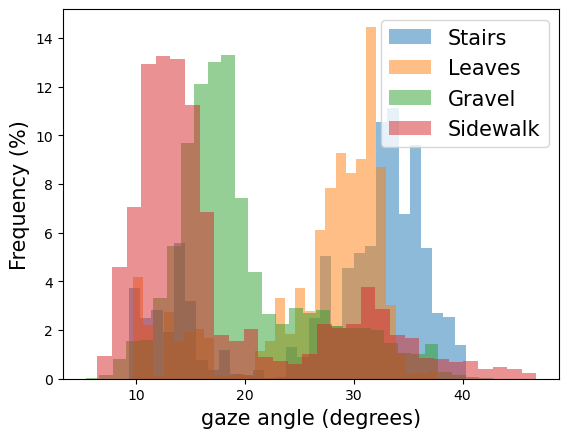

In [117]:
# computing individual again
dataPath = os.path.join(os.getcwd(), 'data/pilot_aug09/pilot_with_events')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

#compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
pilot_outdoorwalking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

#create integrated dataframe of timestamp and gaze angle
angles_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_df = pd.DataFrame(angles_data)
stairs = angles_df['Gaze Angle'].loc[(angles_df['Timestamp'] >= 1691610584281639000) & (angles_df['Timestamp'] <= 1691610593230389000)]
stairs2 = angles_df['Gaze Angle'].loc[(angles_df['Timestamp'] >= 1691611285724448000) & (angles_df['Timestamp'] <= 1691611294296775000)]
stairs = pd.concat([stairs, stairs2])
leaves = angles_df['Gaze Angle'].loc[(angles_df['Timestamp'] >= 1691610723238667000) & (angles_df['Timestamp'] <= 1691610733346276000)]
gravel = angles_df['Gaze Angle'].loc[(angles_df['Timestamp'] >= 1691610942212397000) & (angles_df['Timestamp'] <= 1691611057986421000)]
sidewalk = angles_df['Gaze Angle'].loc[(angles_df['Timestamp'] >= 1691611063127155000) & (angles_df['Timestamp'] <= 1691611128551700000)]
sidewalk2 = angles_df['Gaze Angle'].loc[(angles_df['Timestamp'] >= 1691611161952897000) & (angles_df['Timestamp'] <= 1691611187694605000)]
sidewalk = pd.concat([sidewalk, sidewalk2])

# graph these
plt.figure()

hist, bin_edges = np.histogram(stairs, 30)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

hist, bin_edges = np.histogram(leaves, 30)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

hist, bin_edges = np.histogram(gravel, 30)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

hist, bin_edges = np.histogram(sidewalk, 30)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)
plt.xlabel('gaze angle (degrees)', fontsize=15)
plt.ylabel('Frequency (%)', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Stairs', 'Leaves', 'Gravel', 'Sidewalk'], fontsize=15)

plt.show()


In [22]:
# gaze angles natasha indoor
dataPath = os.path.join(os.getcwd(), 'natasha_conversation_reading_writing')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

#compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
natasha_indoor = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

#create integrated dataframe of timestamp and gaze angle
angles_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_df = pd.DataFrame(angles_data)
angles_df['Gaze Angle'] = angles_df['Gaze Angle']
natasha_indoor = angles_df.loc[(angles_df['Timestamp'] >= 1691536329589874000) & (angles_df['Timestamp'] <= 1691536811761430000)]

gaze_positions_natasha_indoor = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
gaze_positions_natasha_indoor = gaze_positions_natasha_indoor.loc[((gaze_positions_natasha_indoor['timestamp [ns]'] >= 1691536329589874000) & (gaze_positions_natasha_indoor['timestamp [ns]'] <= 1691536811761430000))]
gaze_positions_natasha_indoor = computeGazeDist(gaze_positions_natasha_indoor)


In [24]:
# gaze angles alex indoor and outdoor
dataPath = os.path.join(os.getcwd(), 'alex_1')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

#compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
alex_walking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

#create integrated dataframe of timestamp and gaze angle
angles_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_df = pd.DataFrame(angles_data)
angles_df['Gaze Angle'] = angles_df['Gaze Angle']
alex_indoor_1 = angles_df.loc[(angles_df['Timestamp'] >= 1688060467770048000) & (angles_df['Timestamp'] <= 1688060605095243000)]
alex_indoor_2 = angles_df.loc[(angles_df['Timestamp'] >= 1688060609064666000) & (angles_df['Timestamp'] <= 1688060635423163000)]
alex_indoor_12 = pd.concat([alex_indoor_1, alex_indoor_2])


alex_outdoor_1 = angles_df.loc[(angles_df['Timestamp'] >= 1688060635423163000) & (angles_df['Timestamp'] <= 1688061288550290000)]
alex_outdoor_2 = angles_df.loc[(angles_df['Timestamp'] >= 1688061414791000000)]
alex_outdoor_12 = pd.concat([alex_outdoor_1, alex_outdoor_2])

# alex 2
dataPath = os.path.join(os.getcwd(), 'alex_2')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

#compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
alex_walking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

#create integrated dataframe of timestamp and gaze angle
angles_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_df = pd.DataFrame(angles_data)
angles_df['Gaze Angle'] = angles_df['Gaze Angle']
alex_indoor_1 = angles_df.loc[(angles_df['Timestamp'] >= 1688062394156000000) & (angles_df['Timestamp'] <= 1688062460350416000)]
alex_indoor_2 = angles_df.loc[(angles_df['Timestamp'] >= 1688062722298369000) & (angles_df['Timestamp'] <= 1688062803844989000)]
alex_indoor_3 = angles_df.loc[(angles_df['Timestamp'] >= 1688063036644000000) & (angles_df['Timestamp'] <= 1688063045486104000)]
alex_indoor_4 = angles_df.loc[(angles_df['Timestamp'] >= 1688063185746000000) & (angles_df['Timestamp'] <= 1688063234025514000)]
alex_indoor_5 = angles_df.loc[(angles_df['Timestamp'] >= 1688063277160676000) & (angles_df['Timestamp'] <= 1688063305051974000)]
alex_indoor_6 = angles_df.loc[(angles_df['Timestamp'] >= 1688063332565510000)]
alex_indoor_122 = pd.concat([alex_indoor_1, alex_indoor_2, alex_indoor_3, alex_indoor_4, alex_indoor_5, alex_indoor_6])

alex_outdoor_1 = angles_df.loc[(angles_df['Timestamp'] >= 1688062803844989000) & (angles_df['Timestamp'] <= 1688062842855549000)]
# alex_outdoor_2 = angles_df.loc[(angles_df['Timestamp'] >= 1688061414791000000)]
alex_outdoor_122 = pd.concat([alex_outdoor_1])

# alex 2
dataPath = os.path.join(os.getcwd(), 'alex_3')

# run cleanup 
command = ["python", cleanupPath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'eyedata.pkl')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
pupil_data = pickle.load(open(os.path.join(dataPath, 'eyedata.pkl'), 'rb'))

#compute gaze angle
command = ["python", getgazePath, dataPath]
if not os.path.exists(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv')):
    subprocess.run(command, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
gaze_angles = pd.read_csv(os.path.join(dataPath, 'gaze_angle_relative_to_gravity.csv'))
alex_walking = {'pupil_data': pupil_data, 'gaze_angles': gaze_angles}

#create integrated dataframe of timestamp and gaze angle
angles_data = {'Timestamp' : pupil_data['gaze']['timestamp [ns]'], 'Gaze Angle': gaze_angles['angle']}
angles_df = pd.DataFrame(angles_data)
angles_df['Gaze Angle'] = angles_df['Gaze Angle']
alex_indoor_1 = angles_df.loc[(angles_df['Timestamp'] >= 1688063712569000000) & (angles_df['Timestamp'] <= 1688063758373496000)]
alex_indoor_2 = angles_df.loc[(angles_df['Timestamp'] >= 1688063881001216000) & (angles_df['Timestamp'] <= 1688063933068918000)]
alex_indoor_3 = angles_df.loc[(angles_df['Timestamp'] >= 1688064326420760000) & (angles_df['Timestamp'] <= 1688064381721000000)]

alex_indoor_123 = pd.concat([alex_indoor_1, alex_indoor_2, alex_indoor_3])

alex_outdoor_1 = angles_df.loc[(angles_df['Timestamp'] >= 1688063933068918000) & (angles_df['Timestamp'] <= 1688064326420760000)]
# alex_outdoor_2 = angles_df.loc[(angles_df['Timestamp'] >= 1688061414791000000)]
alex_outdoor_123 = pd.concat([alex_outdoor_1])

alex_indoor = pd.concat([alex_indoor_12, alex_indoor_122, alex_indoor_123])
alex_outdoor = pd.concat([alex_outdoor_12, alex_outdoor_122, alex_outdoor_123])


In [25]:
# get gaze pixel data into a dataframe
dataPath = os.path.join(os.getcwd(), 'pilot_lego')
gaze_positions_pilot = pd.read_csv(os.path.join(dataPath, 'gaze.csv'))
reading = gaze_positions_pilot.loc[(gaze_positions_pilot['timestamp [ns]'] >= 1691612762478540000) & (gaze_positions_pilot['timestamp [ns]'] <= 1691612817868416000) | (gaze_positions_pilot['timestamp [ns]'] >= 1691612925597140000) & (gaze_positions_pilot['timestamp [ns]'] <= 1691613224202778000)]
conversation = gaze_positions_pilot.loc[(gaze_positions_pilot['timestamp [ns]'] <= 1691612762478540000)]
writing = gaze_positions_pilot.loc[(gaze_positions_pilot['timestamp [ns]'] >= 1691613270345638000) & (gaze_positions_pilot['timestamp [ns]'] <= 1691613801370476000)]
lego = gaze_positions_pilot.loc[(gaze_positions_pilot['timestamp [ns]'] >= 1691613868954126000) & (gaze_positions_pilot['timestamp [ns]'] <= 1691614535323114000) | (gaze_positions_pilot['timestamp [ns]'] >= 1691614580850701000)]
pilot_gaze_positions = list([reading, conversation, writing, lego])

reading = computeGazeDist(reading)
conversation = computeGazeDist(conversation)
writing = computeGazeDist(writing)
lego = computeGazeDist(lego)
pilot_short_gazes = list([reading, conversation, writing, lego])


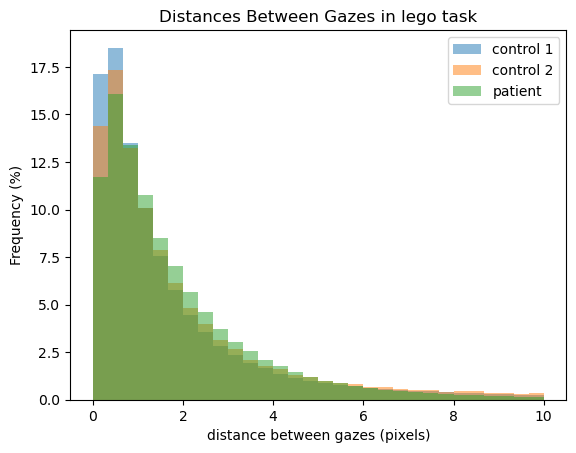

In [20]:
# graphing gaze pixel positions during lego task for pilot, natasha, feven
plt.figure()

# plot 3 distance distributions
gaze_distance_control1 = gaze_distance_control1.loc[gaze_distance_control1<10]
hist, bin_edges = np.histogram(gaze_distance_control1, 30)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

gaze_distance_control2 = gaze_distance_control2.loc[gaze_distance_control2<10]
hist, bin_edges = np.histogram(gaze_distance_control2, 30)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

gaze_distance_pilot = gaze_distance_pilot.loc[gaze_distance_pilot<10]
hist, bin_edges = np.histogram(gaze_distance_pilot, 30)
hist_fraction = (hist/np.sum(hist))*100
plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)
plt.legend(['control 1', 'control 2', 'patient'])
plt.title('Distances Between Gazes in lego task')
plt.xlabel('distance between gazes (pixels)')
plt.ylabel('Frequency (%)')
plt.show()


In [47]:
# run ttest with gaze distances
print('TTest Comparison of Natasha and Patient Gaze Distance with lego Task')
print(scipy.stats.ttest_ind(a=gaze_distance_control2.to_numpy(), b=gaze_distance_pilot.to_numpy(), equal_var=True))

print('TTest Comparison of Natasha and Feven Gaze Distance with lego Task')
print(scipy.stats.ttest_ind(a=gaze_distance_control1.to_numpy(), b=gaze_distance_control2.to_numpy(), equal_var=True))

print('TTest Comparison of Feven and Patient Gaze Distance with lego Task')
print(scipy.stats.ttest_ind(a=gaze_distance_control1.to_numpy(), b=gaze_distance_pilot.to_numpy(), equal_var=True))

from scipy.stats import f_oneway
f_oneway(gaze_distance_control2, gaze_distance_control1, gaze_distance_pilot)



TTest Comparison of Natasha and Patient Gaze Distance with lego Task
TtestResult(statistic=2.7792202485346427, pvalue=0.0054492843686137415, df=310201.0)
TTest Comparison of Natasha and Feven Gaze Distance with lego Task
TtestResult(statistic=-18.56612991482946, pvalue=6.69479864422767e-77, df=290177.0)
TTest Comparison of Feven and Patient Gaze Distance with lego Task
TtestResult(statistic=-26.05691134788934, pvalue=1.431526425741378e-149, df=476354.0)


F_onewayResult(statistic=396.0380476627013, pvalue=1.34667725211701e-172)

In [48]:
print('KS Test Comparison of Natasha and Patient Gaze Distance with lego Task')
print(scipy.stats.ks_2samp(gaze_distance_control2.to_numpy(), gaze_distance_pilot.to_numpy(), alternative='two-sided', method='auto'))

print('KS Test Comparison of Natasha and Feven Gaze Distance with lego Task')
print(scipy.stats.ks_2samp(gaze_distance_control2.to_numpy(), gaze_distance_control1.to_numpy(), alternative='two-sided', method='auto'))

print('TTest Comparison of Feven and Patient Gaze Distance with lego Task')
print(scipy.stats.ks_2samp(gaze_distance_control1.to_numpy(), gaze_distance_pilot.to_numpy(), alternative='two-sided', method='auto'))


KS Test Comparison of Natasha and Patient Gaze Distance with lego Task
KstestResult(statistic=0.04020337449705458, pvalue=4.057402487367312e-70, statistic_location=0.8998010891302702, statistic_sign=1)
KS Test Comparison of Natasha and Feven Gaze Distance with lego Task
KstestResult(statistic=0.043338831206022554, pvalue=5.0936418058449316e-80, statistic_location=1.0963817765723733, statistic_sign=-1)
TTest Comparison of Feven and Patient Gaze Distance with lego Task
KstestResult(statistic=0.08146087157976228, pvalue=0.0, statistic_location=0.8632873218112873, statistic_sign=1)


In [16]:
print('KS Test Comparison of Natasha and Patient Gaze Distance with lego Task')
print(scipy.stats.ks_2samp(natasha_short_fixations[3].to_numpy(), pilot_short_fixations[3].to_numpy(), alternative='two-sided', method='auto'))
print('KS Test Comparison of Natasha and Patient Gaze Distance with reading Task')
print(scipy.stats.ks_2samp(natasha_short_fixations[0].to_numpy(), pilot_short_fixations[0].to_numpy(), alternative='two-sided', method='auto'))

print('KS Test Comparison of Natasha and Patient Gaze Distance with writing Task')
print(scipy.stats.ks_2samp(natasha_short_fixations[2].to_numpy(), pilot_short_fixations[2].to_numpy(), alternative='two-sided', method='auto'))

print('KS Test Comparison of Natasha and Patient Gaze Distance with conversation Task')
print(scipy.stats.ks_2samp(natasha_short_fixations[1].to_numpy(), pilot_short_fixations[1].to_numpy(), alternative='two-sided', method='auto'))



KS Test Comparison of Natasha and Patient Gaze Distance with lego Task
KstestResult(statistic=0.3586171567262165, pvalue=9.624719930467872e-37, statistic_location=8.281877875162204, statistic_sign=-1)
KS Test Comparison of Natasha and Patient Gaze Distance with reading Task
KstestResult(statistic=0.2726935250674065, pvalue=1.5583264304159212e-07, statistic_location=3.885565339247295, statistic_sign=-1)
KS Test Comparison of Natasha and Patient Gaze Distance with writing Task
KstestResult(statistic=0.27735880434704013, pvalue=3.4004894170598887e-12, statistic_location=8.076850607013446, statistic_sign=-1)
KS Test Comparison of Natasha and Patient Gaze Distance with conversation Task
KstestResult(statistic=0.54260918837511, pvalue=2.155456428928483e-34, statistic_location=7.6560427655679995, statistic_sign=-1)


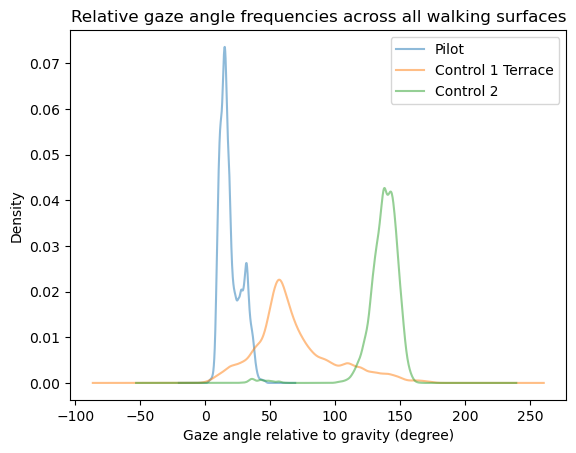

In [106]:
# line graph of gaze frequencies across full trial (excluding the sitting)
plt.figure()
walking_all['Gaze Angle'].plot.density(alpha=0.5)
angles_control1_df['Gaze Angle'].plot.density(alpha=0.5)
angles_control2_df_final['Gaze Angle'].plot.density(alpha=0.5)
plt.xlabel('Gaze angle relative to gravity (degree)')
plt.title('Relative gaze angle frequencies across all walking surfaces')
plt.legend(['Pilot', 'Control 1 Terrace', 'Control 2'])
plt.show()

In [3]:
# line graph of gaze frequencies on different surfaces
plt.figure()
grounds = [stairs, street, pavement, leaves, gravel, sidewalk]
for ch in grounds:
    ch['Gaze Angle'].plot.density(alpha=0.5)


plt.xlabel('Gaze angle relative to gravity (degree)')
plt.title('Relative Gaze Angle Frequencies on Varying Surfaces for Pilot Patient')
plt.legend(['stairs', 'street', 'pavement', 'leaves', 'gravel', 'sidewalk'])
plt.show()

NameError: name 'stairs' is not defined

<Figure size 640x480 with 0 Axes>

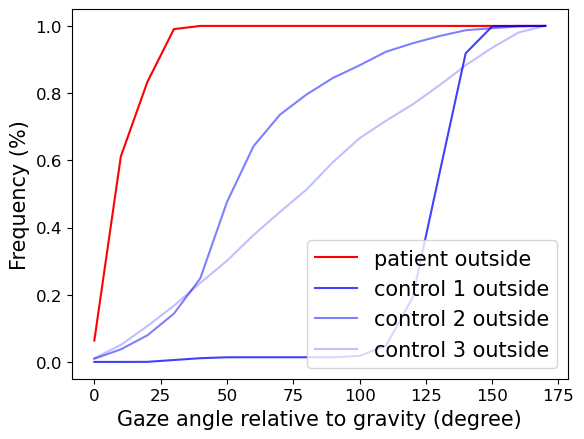

In [116]:
# frequency of gaze_angles graph
num_bins = 18
bin_edges = np.linspace(0,180,num_bins+1)

plt.figure()
# grounds = [stairs, street, pavement, leaves, gravel, sidewalk]

hist, _ = np.histogram(angles_outdoor_pilot['Gaze Angle'], bin_edges)
hist_fraction = (hist/np.sum(hist))*100
#plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5, color='red')

pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1], cdf, label="CDF", color='red')

# hist, _ = np.histogram(angles_indoor_pilot['Gaze Angle'], bin_edges)
# hist_fraction = (hist/np.sum(hist))*100
# pdf = hist / sum(hist)
# cdf = np.cumsum(pdf)
# #plt.plot(bin_edges[:-1], cdf, label="CDF", color='red')

# plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5, color='red')

hist, _ = np.histogram(angles_control2_df_final['Gaze Angle'], bin_edges)
hist_fraction = (hist/np.sum(hist))*100
#plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5, color='blue')
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1], cdf, label="CDF", color='blue', alpha=0.75)

# hist, _ = np.histogram(natasha_indoor['Gaze Angle'], bin_edges)
# hist_fraction = (hist/np.sum(hist))*100
# pdf = hist / sum(hist)
# cdf = np.cumsum(pdf)
# #plt.plot(bin_edges[:-1], cdf, label="CDF", color='blue', alpha=0.75)
# plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5, color='blue')

hist, _ = np.histogram(angles_control1_df['Gaze Angle'], bin_edges)
hist_fraction = (hist/np.sum(hist))*100
#plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5, color='blue')
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1], cdf, label="CDF", color='blue', alpha=0.5)

# hist, _ = np.histogram(angles_indoor_df['Gaze Angle'], bin_edges)
# hist_fraction = (hist/np.sum(hist))*100
# pdf = hist / sum(hist)
# cdf = np.cumsum(pdf)
# #plt.plot(bin_edges[:-1], cdf, label="CDF", color='blue', alpha=0.5)
# plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5, color='blue')

hist, _ = np.histogram(alex_outdoor['Gaze Angle'], bin_edges)
hist_fraction = (hist/np.sum(hist))*100
#plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5, color='blue')
pdf = hist / sum(hist)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1], cdf, label="CDF", color='blue', alpha=0.25)

# hist, _ = np.histogram(alex_indoor['Gaze Angle'], bin_edges)
# hist_fraction = (hist/np.sum(hist))*100
# pdf = hist / sum(hist)
# cdf = np.cumsum(pdf)
# #plt.plot(bin_edges[:-1], cdf, label="CDF", color='blue', alpha=0.25)
# plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5, color='blue')


plt.xlabel('Gaze angle relative to gravity (degree)', fontsize=15)
plt.ylabel('Frequency (%)', fontsize=15)
plt.legend(['patient outside',  'control 1 outside','control 2 outside', 'control 3 outside', ], fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.title("Relative Frequencies of Various Gaze Angles for Study Participants During Walking Task")
plt.show()


Proportion of natasha gazes that were on face: 45.0
Proportion of natasha fixations that were on face: 10.65
Proportion of patient gazes that were on face: 4.56
Proportion of patient fixations that were on face: 7.5


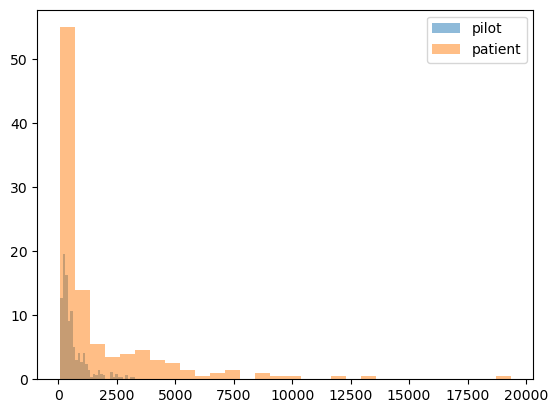

In [53]:
# face fixation and gaze analysis for conversation task
dataPath = '/Users/natashabanga/Documents/PsychSummer/pilot_analysis/natasha_pilot_FACE-MAPPER_natasha_pilot_face'
plt.figure()
def faceAnalysis(dataPath, type, fixations, gazes):
    proportion = round(len(gazes.loc[gazes['gaze on face'] == True]) / len(gazes) * 100, 2)
    print(f'Proportion of {type} gazes that were on face: ' + str(proportion))

    proportion = round(len(fixations.loc[fixations['fixation on face'] == True]) / len(fixations) * 100, 2)
    print(f'Proportion of {type} fixations that were on face: ' + str(proportion))

    # histogram of fixation duration frequencies (calculated by Pupil Labs)
    hist, bin_edges = np.histogram(fixations['duration [ms]'], 30)
    hist_fraction = (hist/np.sum(hist))*100
    plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

fixs = pd.read_csv(os.path.join(dataPath, 'fixations_on_face.csv'))
fixs = fixs.loc[(fixs['start timestamp [ns]'] >= 1691536889572963000) & (fixs['end timestamp [ns]'] <= 1691537140220354000)]
gazs = pd.read_csv(os.path.join(dataPath, 'gaze_on_face.csv'))
gazs = gazs.loc[(gazs['timestamp [ns]'] >= 1691536889572963000) & (gazs['timestamp [ns]'] <= 1691537140220354000)]
faceAnalysis(dataPath, 'natasha', fixs, gazs)


dataPath = '/Users/natashabanga/Documents/PsychSummer/pilot_analysis/pilot_patient_FACE-MAPPER_pilot_face_final/'
fixs = pd.read_csv(os.path.join(dataPath, 'fixations_on_face.csv'))
fixs = fixs.loc[(fixs['start timestamp [ns]'] >= 1691612398489224000) & (fixs['end timestamp [ns]'] <= 1691612762478540000)]
gazs = pd.read_csv(os.path.join(dataPath, 'gaze_on_face.csv'))
gazs = gazs.loc[(gazs['timestamp [ns]'] >= 1691612398489224000) & (gazs['timestamp [ns]'] <= 1691612762478540000)]
faceAnalysis(dataPath, 'patient', fixs, gazs)
plt.legend(['pilot', 'patient'])
plt.show()


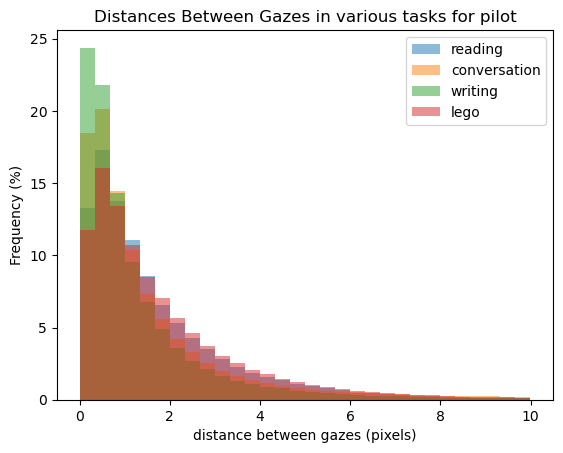

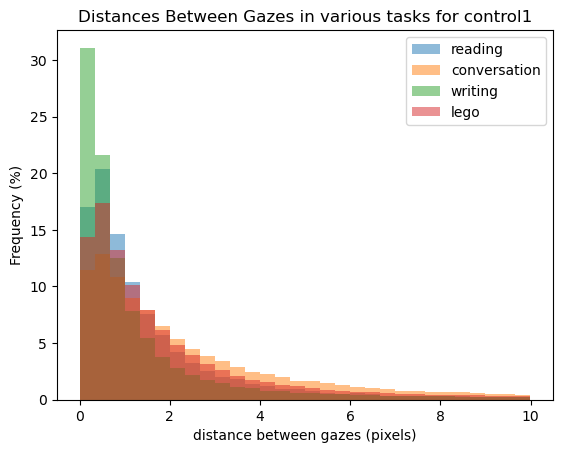

[2, 4, 5]


In [75]:
# differences in gaze distances between reading, writing, conversation, and lego tasks for just patient
def graphAll(foo, titl):
    plt.figure()

    def graphIt(array):
        array = array.loc[array<10]
        hist, bin_edges = np.histogram(array, 30)
        hist_fraction = (hist/np.sum(hist))*100
        plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)

    for ch in foo:
        graphIt(ch)


    plt.legend(['reading', 'conversation', 'writing', 'lego'])
    plt.title(f'Distances Between Gazes in various tasks for {titl}')
    plt.xlabel('distance between gazes (pixels)')
    plt.ylabel('Frequency (%)')
    plt.show()

graphAll(pilot_short_gazes, 'pilot')
graphAll(natasha_short_gazes, 'control1')


In [69]:
def average(num):
    shorter = min(len(natasha_short_fixations[num]), len(feven_short_fixations[num]))
    longerDf = natasha_short_fixations[num]
    added = pd.Series([(natasha_short_fixations[num][i] + feven_short_fixations[num][i]) / 2 for i in range(shorter)])
    if len(natasha_short_fixations[num]) == shorter:
        longerDf = feven_short_fixations[num]
    return pd.concat([added, longerDf.iloc[shorter:]])

all_control_fixations = [average(i) for i in range(4)]

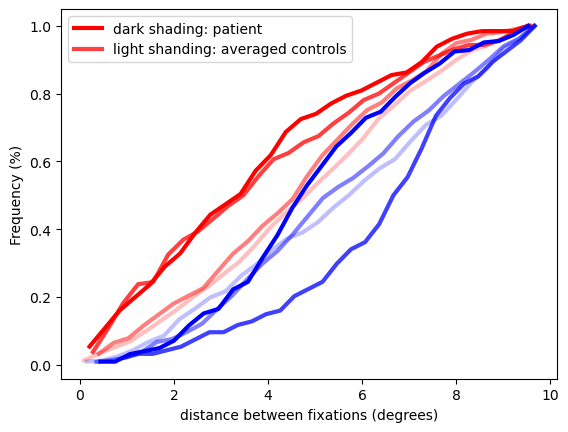

In [123]:
# differences in gaze distances between reading, writing, conversation, and lego tasks for just patient
plt.figure()

def graphAll(foo, titl, color):

    def graphIt(array, alpha, color):
        array = array.loc[array<10]
        hist, bin_edges = np.histogram(array, 30)
        pdf = hist / sum(hist)
        cdf = np.cumsum(pdf)
        plt.plot(bin_edges[:-1], cdf, label="CDF", alpha=alpha, color=color, linewidth = 3)
        # hist_fraction = (hist/np.sum(hist))*100
        # plt.bar(bin_edges[:-1], hist_fraction, width=np.diff(bin_edges), align='edge', alpha=.5)
    i = 0
    alpha = [1, 0.75, 0.5, 0.25]
    for ch in foo:
        graphIt(ch, alpha[i], color)
        i += 1


    plt.legend(['reading', 'conversation', 'writing', 'lego'])
    #plt.title(f'Distances Between Fixations in various tasks')
    plt.xlabel('distance between fixations (degrees)')
    plt.ylabel('Frequency (%)')
    

graphAll(pilot_short_fixations, 'pilot', 'red')
graphAll(natasha_short_fixations, 'control1', 'blue')
plt.legend(['dark shading: patient', 'light shanding: averaged controls'])
plt.show()


In [289]:
# collecting data across all subjects for use in classification analysis
# natasha_outdoor = angles_control2_df_final
# #natasha_outdoor.insert(len(natasha_outdoor.columns), 'SubjectID', 'Control')
# #natasha_outdoor.rename(columns={'Gaze Angle' : 'Outdoor Gaze Angle'}, inplace=True)
feven_indoor = angles_indoor_df
#feven_indoor = feven_indoor.drop(columns='subjectID')
#feven_indoor['SubjectID'] = 0
#feven_indoor.insert(len(feven_indoor.columns), 'SubjectID', 'Control')
#feven_indoor.rename(columns={'Gaze Angle' : 'Indoor Gaze Angle'}, inplace=True)
# feven_indoor = feven_indoor.drop(columns='subjectID')

# feven_outdoor = angles_control1_df
# #feven_outdoor.insert(len(feven_outdoor.columns), 'SubjectID', 'Control')
# feven_outdoor.rename(columns={'Gaze Angle' : 'Outdoor Gaze Angle'}, inplace=True)
patient_outdoor = angles_outdoor_pilot

# patient_outdoor.insert(len(patient_outdoor.columns), 'SubjectID', 'Patient')
# patient_outdoor['SubjectID'] = 1
patient_indoor = angles_indoor_pilot
# patient_indoor.insert(len(patient_indoor.columns), 'SubjectID', 1)
# patient_indoor.rename(columns={'Gaze Angle' : 'Indoor Gaze Angle'}, inplace=True)
# #pd.concat([natasha_indoor, feven_indoor, feven_outdoor, patient_outdoor, patient_indoor])
natasha_indoor_fr = natasha_indoor
# natasha_indoor_fr.insert(len(natasha_indoor_fr.columns), 'SubjectID', 0)
# natasha_indoor_fr.rename(columns={'Gaze Angle' : 'Indoor Gaze Angle'}, inplace=True)

# add alex data
alex_indoorfr = alex_indoor
# alex_indoorfr.insert(len(alex_indoorfr.columns), 'SubjectID', '0')
# alex_indoorfr.rename(columns={'Gaze Angle' : 'Outdoor Gaze Angle'}, inplace=True)
alex_outdoorfr = alex_outdoor

# alex_outdoorfr.insert(len(alex_outdoorfr.columns), 'SubjectID', '0')
# alex_outdoorfr.rename(columns={'Gaze Angle' : 'Outdoor Gaze Angle'}, inplace=True)
# alex_outdoorfr.rename(columns={'Indoor Gaze Angle' : 'Outdoor Gaze Angle'}, inplace=True)
# alex_indoorfr.rename(columns={'Outdoor Gaze Angle' : 'Indoor Gaze Angle'}, inplace=True)

print(patient_indoor)
# all_outdoor = pd.concat([natasha_indoor_fr, feven_indoor, patient_indoor, alex_indoorfr])
# all_outdoor.to_csv('/Users/natashabanga/Documents/PsychSummer/pilot_analysis/all_indoor_walking.csv')



                 Timestamp  Gaze Angle
10644  1691611624211192835   42.263112
10645  1691611624217475835   42.012573
10646  1691611624220594835   42.035750
10647  1691611624226844835   41.846497
10648  1691611624230049835   41.743593
...                    ...         ...
94346  1691612043270630835  127.735841
94347  1691612043276838835  127.721059
94348  1691612043279947835  127.712083
94349  1691612043286215835  127.686048
94350  1691612043289335835  127.669625

[56105 rows x 2 columns]


In [66]:
# gaze vs. fixations for pilot
print(pilot_short_gazes[0])
#print(natasha_short_gazes[0])

Series([], dtype: float64)


In [270]:
# combining all saccadic amplitude data, making violin plots for saccades vs. head movements
natasha_short_gazes1 = [pd.DataFrame({'Saccadic Amplitude' : ch, 'SubjectID' : [0] * len(ch)}) for ch in natasha_short_gazes]
feven_short_gazes1 = [pd.DataFrame({'Saccadic Amplitude' : ch, 'SubjectID' : [0] * len(ch)}) for ch in feven_short_gazes]
pilot_short_gazes1 = [pd.DataFrame({'Saccadic Amplitude' : ch, 'SubjectID' : [1] * len(ch)}) for ch in pilot_short_gazes]

reading_all = pd.concat([natasha_short_gazes1[0], feven_short_gazes1[0], pilot_short_gazes1[0]])
reading_all.to_csv('/Users/natashabanga/Documents/PsychSummer/pilot_analysis/all_reading.csv')
conversation_all = pd.concat([natasha_short_gazes1[1], feven_short_gazes1[1], pilot_short_gazes1[1]])
conversation_all.to_csv('/Users/natashabanga/Documents/PsychSummer/pilot_analysis/all_conversation.csv')
writing_all = pd.concat([natasha_short_gazes1[2], feven_short_gazes1[2], pilot_short_gazes1[2]])
writing_all.to_csv('/Users/natashabanga/Documents/PsychSummer/pilot_analysis/all_writing.csv')
lego_all = pd.concat([natasha_short_gazes1[3], feven_short_gazes1[3], pilot_short_gazes1[3]])
lego_all.to_csv('/Users/natashabanga/Documents/PsychSummer/pilot_analysis/all_lego.csv')